In [1]:
# 튜닝된 CatBoost을 이용한 불확실성 값 추정 --> 피처 생성 --> 다른 모델 학습 자료로 활용

# 튜닝된 xgboost을 이용한 불확실성 구간 추정
# 튜닝된 lgbm을 이용한 불확실성 구간 추정

# 불확실성 종합 앙상블 --> 시각화

In [2]:
# 임포트
import os
os.chdir('/Users/jiyongkim/PycharmProjects/house_price_predict/')

In [3]:
from utils.utils_preprocess import *
from train.preprocess import *
from utils.utils_train import *
from utils.utils_optuna import *
from uncertainty_estimation.utils_uncertainty import *
from uncertainty_estimation.ensemble_model_utils import *
from uncertainty_estimation.uncertatinty_main import *


 mu = 12.02 and sigma = 0.40



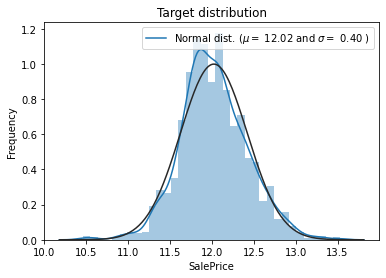

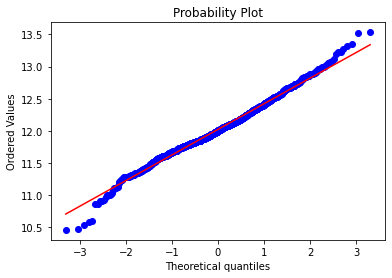

all_data size is : (2919, 79)
Shape all_data: (2919, 79)
                    Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.498578
1stFlrSF        1.469604
BsmtFinSF1      1.425230
GrLivArea       1.269358
TotalBsmtSF     1.156894
BsmtUnfSF       0.919339
2ndFlrSF        0.861675
TotRmsAbvGrd    0.758367
Fireplaces      0.733495
HalfBath        0.694566
BsmtFullBath    0.624832
OverallCond     0.570312
HeatingQC       0.486656
FireplaceQu     0.333787
BedroomAbvGr    0.326324
GarageArea      0.239257
OverallQual     0.197110
FullBath        0.167606
MSSubClass      0.138396
YrSold          0.132399
BsmtFinType1    0.084633
GarageCars     -0.

In [4]:
# 데이터 불러오기
X_train_df, X_test_df, y_train_df, test_df_id = get_final_train_test()

category_feature, int64_feature, float64_feature = \
    get_numerous_category_feature(X_train_df)

In [5]:
uncertainties, X_train_df_new, X_test_df_new = \
    get_uncertainty_feature(X_train_df, y_train_df, X_test_df, category_feature)

[I 2022-10-30 16:13:54,075] A new study created in memory with name: no-name-1dad980f-f772-4662-8735-590cb99227bc


error type: rmse, error: 0.13277
error type: rmse, error: 0.14244
error type: rmse, error: 0.13390
error type: rmse, error: 0.12362


[I 2022-10-30 16:13:55,996] Trial 0 finished with value: 0.12832676308636096 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Ordered', 'od_type': 'IncToDec', 'colsample_bylevel': 0.07817620484599767, 'l2_leaf_reg': 2.0501505768943493e-07, 'learning_rate': 0.46970621620772296, 'iterations': 861, 'min_child_samples': 23, 'depth': 6}. Best is trial 0 with value: 0.12832676308636096.


error type: rmse, error: 0.10890
error type: rmse, error: 0.10892
error type: rmse, error: 0.11045
error type: rmse, error: 0.11667
error type: rmse, error: 0.11819


[I 2022-10-30 16:13:57,582] Trial 1 finished with value: 0.11373292241111088 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Ordered', 'od_type': 'Iter', 'colsample_bylevel': 0.015061485755526585, 'l2_leaf_reg': 0.5870530339592971, 'learning_rate': 0.04194904166246714, 'iterations': 386, 'min_child_samples': 23, 'depth': 5}. Best is trial 1 with value: 0.11373292241111088.


error type: rmse, error: 0.11443
error type: rmse, error: 0.10441
error type: rmse, error: 0.09903
error type: rmse, error: 0.09268
error type: rmse, error: 0.11708


[I 2022-10-30 16:14:00,985] Trial 2 finished with value: 0.10270256680449 and parameters: {'bootstrap_type': 'Bernoulli', 'boosting_type': 'Ordered', 'od_type': 'Iter', 'colsample_bylevel': 0.06209044294303965, 'l2_leaf_reg': 1.2619301694481486e-07, 'learning_rate': 0.06599904423305489, 'iterations': 1763, 'min_child_samples': 1, 'depth': 4, 'subsample': 0.5703725176363028}. Best is trial 2 with value: 0.10270256680449.


error type: rmse, error: 0.10032
saving model...models/CatBoostRegressor-0.10270.npy

 Model index: 0

0:	learn: 0.3072686	test: 0.3401139	best: 0.3401139 (0)	total: 1.85ms	remaining: 3.27s


[I 2022-10-30 16:14:01,998] A new study created in memory with name: no-name-702a940b-7e2e-4c8c-be37-141efc8e1a14


100:	learn: -0.7985061	test: -0.5709592	best: -0.5709592 (100)	total: 193ms	remaining: 3.17s
Stopped by overfitting detector  (20 iterations wait)

bestTest = -0.6263207196
bestIteration = 135

Shrink model to first 136 iterations.
error type: rmse, error: 0.09977
error type: rmse, error: 0.12805
error type: rmse, error: 0.12441
error type: rmse, error: 0.11732


[I 2022-10-30 16:14:02,846] Trial 0 finished with value: 0.11558421385709856 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Plain', 'od_type': 'IncToDec', 'colsample_bylevel': 0.04884877930967453, 'l2_leaf_reg': 1.0562823966649419e-07, 'learning_rate': 0.25959414037469813, 'iterations': 1171, 'min_child_samples': 17, 'depth': 7}. Best is trial 0 with value: 0.11558421385709856.


error type: rmse, error: 0.10837
error type: rmse, error: 0.10315
error type: rmse, error: 0.11712
error type: rmse, error: 0.10068
error type: rmse, error: 0.12822


[I 2022-10-30 16:14:05,643] Trial 1 finished with value: 0.1115206119826643 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Ordered', 'od_type': 'IncToDec', 'colsample_bylevel': 0.029896286852433764, 'l2_leaf_reg': 1.4277112058294417e-05, 'learning_rate': 0.16901039489391895, 'iterations': 370, 'min_child_samples': 19, 'depth': 6}. Best is trial 1 with value: 0.1115206119826643.


error type: rmse, error: 0.10844
error type: rmse, error: 0.11448
error type: rmse, error: 0.13059
error type: rmse, error: 0.11302
error type: rmse, error: 0.12001


[I 2022-10-30 16:14:07,078] Trial 2 finished with value: 0.12570598085795315 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Plain', 'od_type': 'Iter', 'colsample_bylevel': 0.09122304628617234, 'l2_leaf_reg': 2.8685604836890945e-07, 'learning_rate': 0.2811905551319838, 'iterations': 902, 'min_child_samples': 5, 'depth': 8}. Best is trial 1 with value: 0.1115206119826643.


error type: rmse, error: 0.15043
saving model...models/CatBoostRegressor-0.11152.npy

 Model index: 1

0:	learn: 0.2479362	test: 0.2963060	best: 0.2963060 (0)	total: 3.93ms	remaining: 1.45s
100:	learn: -1.2375404	test: 0.0823718	best: -0.5426915 (43)	total: 290ms	remaining: 772ms
200:	learn: -1.5625640	test: 2.1691280	best: -0.5426915 (43)	total: 609ms	remaining: 512ms
300:	learn: -1.7823809	test: 6.0897942	best: -0.5426915 (43)	total: 951ms	remaining: 218ms


[I 2022-10-30 16:14:08,969] A new study created in memory with name: no-name-d4848119-903f-4f19-949a-cb3ae432269f


369:	learn: -1.9183535	test: 8.6651131	best: -0.5426915 (43)	total: 1.15s	remaining: 0us

bestTest = -0.5426915313
bestIteration = 43

Shrink model to first 44 iterations.
error type: rmse, error: 0.10623
error type: rmse, error: 0.10489
error type: rmse, error: 0.10144
error type: rmse, error: 0.10996


[I 2022-10-30 16:14:24,646] Trial 0 finished with value: 0.10410421333344891 and parameters: {'bootstrap_type': 'Bernoulli', 'boosting_type': 'Ordered', 'od_type': 'Iter', 'colsample_bylevel': 0.05293994237758285, 'l2_leaf_reg': 8.142809179834079e-06, 'learning_rate': 0.028918350987285592, 'iterations': 1500, 'min_child_samples': 2, 'depth': 6, 'subsample': 0.5824690212981458}. Best is trial 0 with value: 0.10410421333344891.


error type: rmse, error: 0.09800
error type: rmse, error: 0.10850
error type: rmse, error: 0.12499
error type: rmse, error: 0.12046
error type: rmse, error: 0.11015


[I 2022-10-30 16:14:41,168] Trial 1 finished with value: 0.11186441600670827 and parameters: {'bootstrap_type': 'MVS', 'boosting_type': 'Ordered', 'od_type': 'IncToDec', 'colsample_bylevel': 0.01969521632433887, 'l2_leaf_reg': 1.5347651899105224e-05, 'learning_rate': 0.08474212522855537, 'iterations': 919, 'min_child_samples': 2, 'depth': 10}. Best is trial 0 with value: 0.10410421333344891.


error type: rmse, error: 0.09522
error type: rmse, error: 0.09898
error type: rmse, error: 0.10197
error type: rmse, error: 0.12853
error type: rmse, error: 0.12797


[I 2022-10-30 16:18:47,696] Trial 2 finished with value: 0.1124106831097895 and parameters: {'bootstrap_type': 'Bernoulli', 'boosting_type': 'Ordered', 'od_type': 'IncToDec', 'colsample_bylevel': 0.08807468952123132, 'l2_leaf_reg': 1.6379538092037273e-07, 'learning_rate': 0.01051282407761398, 'iterations': 703, 'min_child_samples': 2, 'depth': 11, 'subsample': 0.5940120674060864}. Best is trial 0 with value: 0.10410421333344891.


error type: rmse, error: 0.10461
saving model...models/CatBoostRegressor-0.10410.npy

 Model index: 2

0:	learn: 0.3094348	test: 0.3418167	best: 0.3418167 (0)	total: 2.58ms	remaining: 3.87s
100:	learn: -0.5538028	test: -0.3885244	best: -0.3893896 (99)	total: 413ms	remaining: 5.72s
200:	learn: -0.9041583	test: -0.5502557	best: -0.5504693 (199)	total: 788ms	remaining: 5.09s
Stopped by overfitting detector  (20 iterations wait)

bestTest = -0.5583068796
bestIteration = 210

Shrink model to first 211 iterations.


In [6]:
## 예측 불확실성 추정 (예측 구간 추정)

In [7]:
mean_y_lower, mean_y_upper = get_x_test_interval_only_by_xgb_lgbm(X_train_df_new, y_train_df, \
                                     X_test_df_new, category_feature)

[I 2022-10-30 16:18:51,262] A new study created in memory with name: no-name-0b92a8c3-d32c-41db-9be7-84d1e8999d2b


error type: rmse, error: 0.10336
error type: rmse, error: 0.09847
error type: rmse, error: 0.10804
error type: rmse, error: 0.09845


[I 2022-10-30 16:19:17,758] Trial 0 finished with value: 0.10161778359397142 and parameters: {'lambda': 2.7771931713752434, 'alpha': 0.05898259318897022, 'colsample_bytree': 0.5035034542028294, 'subsample': 0.6261346284834859, 'learning_rate': 0.01575144016081164, 'n_estimators': 2725, 'max_depth': 8, 'min_child_weight': 8}. Best is trial 0 with value: 0.10161778359397142.


error type: rmse, error: 0.09977
error type: rmse, error: 0.11130
error type: rmse, error: 0.10724
error type: rmse, error: 0.09668
error type: rmse, error: 0.09779


[I 2022-10-30 16:19:26,002] Trial 1 finished with value: 0.10715194973908289 and parameters: {'lambda': 5.3098741583581664e-05, 'alpha': 0.0021282120060769185, 'colsample_bytree': 0.47846352355792016, 'subsample': 0.7614885668374175, 'learning_rate': 0.04762181673039127, 'n_estimators': 1876, 'max_depth': 7, 'min_child_weight': 7}. Best is trial 0 with value: 0.10161778359397142.


error type: rmse, error: 0.12275


[I 2022-10-30 16:19:32,259] A new study created in memory with name: no-name-b5d45f12-5920-4779-a12b-aadd5b21404f


saving model...models/XGBRegressor-0.10162.npy
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[476]	training's rmse: 0.323021	training's score: 0.323021	valid_1's rmse: 0.311421	valid_1's score: 0.311421
error type: rmse, error: 0.31142
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[476]	training's rmse: 0.31861	training's score: 0.31861	valid_1's rmse: 0.329592	valid_1's score: 0.329592
error type: rmse, error: 0.32959
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[476]	training's rmse: 0.322316	training's score: 0.322316	valid_1's rmse: 0.314311	valid_1's score: 0.314311
error type: rmse, error: 0.31431
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[476]	training's rmse: 0.320027	training's score: 0.320027	valid_1's rmse: 0.323843	va

[I 2022-10-30 16:19:35,038] Trial 0 finished with value: 0.3213766984774676 and parameters: {'lambda_l1': 0.0007052717952655559, 'lambda_l2': 0.2597052597072284, 'path_smooth': 7.65329617139678e-08, 'learning_rate': 0.00018035436309549123, 'feature_fraction': 0.702396478769768, 'bagging_fraction': 0.6421231598390355, 'num_leaves': 85, 'min_data_in_leaf': 34, 'max_bin': 181, 'n_estimators': 476, 'bagging_freq': 5, 'min_child_weight': 2}. Best is trial 0 with value: 0.3213766984774676.


Did not meet early stopping. Best iteration is:
[476]	training's rmse: 0.319247	training's score: 0.319247	valid_1's rmse: 0.327716	valid_1's score: 0.327716
error type: rmse, error: 0.32772
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[530]	training's rmse: 0.196536	training's score: 0.196536	valid_1's rmse: 0.214322	valid_1's score: 0.214322
error type: rmse, error: 0.21432
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[530]	training's rmse: 0.200098	training's score: 0.200098	valid_1's rmse: 0.195416	valid_1's score: 0.195416
error type: rmse, error: 0.19542
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[530]	training's rmse: 0.195052	training's score: 0.195052	valid_1's rmse: 0.216847	valid_1's score: 0.216847
error type: rmse, error: 0.21685
Training until validation scores don't improve for

[I 2022-10-30 16:19:39,328] Trial 1 finished with value: 0.2041232736805465 and parameters: {'lambda_l1': 0.01130998288762612, 'lambda_l2': 2.021623888747413, 'path_smooth': 1.3931529046671175e-05, 'learning_rate': 0.0014957178949553526, 'feature_fraction': 0.6212309417013493, 'bagging_fraction': 0.8071647043325323, 'num_leaves': 65, 'min_data_in_leaf': 40, 'max_bin': 234, 'n_estimators': 530, 'bagging_freq': 8, 'min_child_weight': 5}. Best is trial 1 with value: 0.2041232736805465.


Did not meet early stopping. Best iteration is:
[530]	training's rmse: 0.201088	training's score: 0.201088	valid_1's rmse: 0.191058	valid_1's score: 0.191058
error type: rmse, error: 0.19106
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[152]	training's rmse: 0.0855664	training's score: 0.0855664	valid_1's rmse: 0.098869	valid_1's score: 0.098869
error type: rmse, error: 0.09887
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[324]	training's rmse: 0.0647602	training's score: 0.0647602	valid_1's rmse: 0.125387	valid_1's score: 0.125387
error type: rmse, error: 0.12539
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[343]	training's rmse: 0.0683593	training's score: 0.0683593	valid_1's rmse: 0.109221	valid_1's score: 0.109221
error type: rmse, error: 0.10922
Training until validation scores don't improve for 100 rounds
Early stopping, best 

[I 2022-10-30 16:19:41,624] Trial 2 finished with value: 0.10931542199089964 and parameters: {'lambda_l1': 2.9504150022677154e-07, 'lambda_l2': 0.6359429021431137, 'path_smooth': 7.427926684391029e-06, 'learning_rate': 0.0679210221125788, 'feature_fraction': 0.5658105614290849, 'bagging_fraction': 0.6332726307981145, 'num_leaves': 56, 'min_data_in_leaf': 63, 'max_bin': 221, 'n_estimators': 539, 'bagging_freq': 7, 'min_child_weight': 17}. Best is trial 2 with value: 0.10931542199089964.


Early stopping, best iteration is:
[416]	training's rmse: 0.0648631	training's score: 0.0648631	valid_1's rmse: 0.104704	valid_1's score: 0.104704
error type: rmse, error: 0.10470
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] lambda_l2 is set=0.6359429021431137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6359429021431137
[LightGBM] [Warning] feature_fraction is set=0.5658105614290849, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5658105614290849
[LightGBM] [Warning] bagging_fraction is set=0.6332726307981145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6332726307981145
[LightGBM] [Warning] lambda_l1 is set=2.9504150022677154e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9504150022677154e-07
saving model..

In [8]:
mean_y_lower

0       11.728044
1       11.965009
2       12.058832
3       12.123095
4       12.082063
          ...    
1454    11.376015
1455    11.370634
1456    11.931577
1457    11.792572
1458    12.249585
Name: expectile_0.05, Length: 1459, dtype: float64

In [9]:
# XGBoostLSS
# LightGBMLSS
# 참고 

In [10]:
####
# 학습 데이터에 대한 추정 시각화(실제 정답지가 있는 데이터에 대한 추정 시각화)

[I 2022-10-30 16:19:44,284] A new study created in memory with name: no-name-f7203b4e-e13a-43ca-985b-f25be9953a73


error type: rmse, error: 0.10112
error type: rmse, error: 0.13377
error type: rmse, error: 0.09134
error type: rmse, error: 0.10073


[I 2022-10-30 16:19:59,168] Trial 0 finished with value: 0.10164065791307038 and parameters: {'lambda': 0.4057443396763554, 'alpha': 0.00023109396649786005, 'colsample_bytree': 0.5843848750392978, 'subsample': 0.713755101500309, 'learning_rate': 0.017019839127300325, 'n_estimators': 1681, 'max_depth': 6, 'min_child_weight': 6}. Best is trial 0 with value: 0.10164065791307038.


error type: rmse, error: 0.08124
error type: rmse, error: 0.10542
error type: rmse, error: 0.12084
error type: rmse, error: 0.09792
error type: rmse, error: 0.09182


[I 2022-10-30 16:20:18,994] Trial 1 finished with value: 0.10264261231058147 and parameters: {'lambda': 3.906078371943241e-05, 'alpha': 1.3056681742884467e-05, 'colsample_bytree': 0.5107312496034101, 'subsample': 0.5377919791923667, 'learning_rate': 0.012169201677747724, 'n_estimators': 1733, 'max_depth': 8, 'min_child_weight': 4}. Best is trial 0 with value: 0.10164065791307038.


error type: rmse, error: 0.09722


[I 2022-10-30 16:20:22,001] A new study created in memory with name: no-name-d99dfb31-a224-4fe9-9f87-7b9b2b145cc6


saving model...models/XGBRegressor-0.10164.npy
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[533]	training's rmse: 0.287657	training's score: 0.287657	valid_1's rmse: 0.328652	valid_1's score: 0.328652
error type: rmse, error: 0.32865
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[533]	training's rmse: 0.298367	training's score: 0.298367	valid_1's rmse: 0.284374	valid_1's score: 0.284374
error type: rmse, error: 0.28437
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[533]	training's rmse: 0.296216	training's score: 0.296216	valid_1's rmse: 0.294065	valid_1's score: 0.294065
error type: rmse, error: 0.29406
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[533]	training's rmse: 0.293914	training's score: 0.293914	valid_1's rmse: 0.303553	

[I 2022-10-30 16:20:24,123] Trial 0 finished with value: 0.29620957387946734 and parameters: {'lambda_l1': 1.140952484350739e-05, 'lambda_l2': 0.031136088909136245, 'path_smooth': 7.276669502096064e-07, 'learning_rate': 0.00038670367734625484, 'feature_fraction': 0.6426023057048124, 'bagging_fraction': 0.5145668881395256, 'num_leaves': 62, 'min_data_in_leaf': 43, 'max_bin': 246, 'n_estimators': 533, 'bagging_freq': 1, 'min_child_weight': 4}. Best is trial 0 with value: 0.29620957387946734.


Did not meet early stopping. Best iteration is:
[533]	training's rmse: 0.301002	training's score: 0.301002	valid_1's rmse: 0.270405	valid_1's score: 0.270405
error type: rmse, error: 0.27040
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2668]	training's rmse: 0.113038	training's score: 0.113038	valid_1's rmse: 0.12707	valid_1's score: 0.12707
error type: rmse, error: 0.12707
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2668]	training's rmse: 0.110059	training's score: 0.110059	valid_1's rmse: 0.13888	valid_1's score: 0.13888
error type: rmse, error: 0.13888
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2668]	training's rmse: 0.114133	training's score: 0.114133	valid_1's rmse: 0.120676	valid_1's score: 0.120676
error type: rmse, error: 0.12068
Training until validation scores don't improve for 

[I 2022-10-30 16:20:39,365] Trial 1 finished with value: 0.1305603472706662 and parameters: {'lambda_l1': 2.4959596649459375e-07, 'lambda_l2': 1.571013598023359e-08, 'path_smooth': 5.243790251845433e-06, 'learning_rate': 0.0006949580475425696, 'feature_fraction': 0.8946082605737087, 'bagging_fraction': 0.6324980780303895, 'num_leaves': 80, 'min_data_in_leaf': 24, 'max_bin': 199, 'n_estimators': 2668, 'bagging_freq': 5, 'min_child_weight': 4}. Best is trial 1 with value: 0.1305603472706662.


Did not meet early stopping. Best iteration is:
[2668]	training's rmse: 0.110799	training's score: 0.110799	valid_1's rmse: 0.140539	valid_1's score: 0.140539
error type: rmse, error: 0.14054
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[149]	training's rmse: 0.0928489	training's score: 0.0928489	valid_1's rmse: 0.115454	valid_1's score: 0.115454
error type: rmse, error: 0.11545
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[143]	training's rmse: 0.0970084	training's score: 0.0970084	valid_1's rmse: 0.102987	valid_1's score: 0.102987
error type: rmse, error: 0.10299
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[405]	training's rmse: 0.0921234	training's score: 0.0921234	valid_1's rmse: 0.122183	valid_1's score: 0.122183
error type: rmse, error: 0.12218
Training until validation scores don't improve for 100 rounds
Early stopping, best

[I 2022-10-30 16:20:40,572] Trial 2 finished with value: 0.11841130187868568 and parameters: {'lambda_l1': 2.8412336578010615, 'lambda_l2': 8.318149506319233e-06, 'path_smooth': 9.531910151649992e-06, 'learning_rate': 0.06830073241286977, 'feature_fraction': 0.7966180364908095, 'bagging_fraction': 0.6461155382926418, 'num_leaves': 16, 'min_data_in_leaf': 39, 'max_bin': 228, 'n_estimators': 2595, 'bagging_freq': 0, 'min_child_weight': 3}. Best is trial 2 with value: 0.11841130187868568.


Early stopping, best iteration is:
[389]	training's rmse: 0.0924375	training's score: 0.0924375	valid_1's rmse: 0.14779	valid_1's score: 0.14779
error type: rmse, error: 0.14779
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l2 is set=8.318149506319233e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.318149506319233e-06
[LightGBM] [Warning] feature_fraction is set=0.7966180364908095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7966180364908095
[LightGBM] [Warning] bagging_fraction is set=0.6461155382926418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6461155382926418
[LightGBM] [Warning] lambda_l1 is set=2.8412336578010615, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8412336578010615
saving model...mod

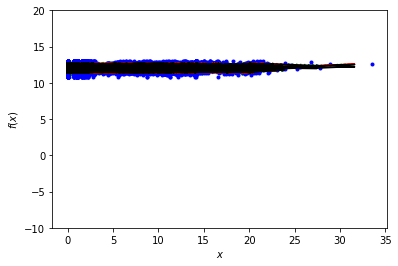

In [11]:
# model_xgb, model_lgbm 0.5씩 앙상블 --> 실제 값 예측 --> 구간 시각화 
plot_train_df_with_y_test(X_train_df_new, y_train_df, category_feature)